In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf


from data.toy_regression import create_split_periodic_data, ground_truth_periodic_function
from core import MapEnsemble
from core.preprocessing import preprocess_create_x_train_test

In [2]:
assert tf.executing_eagerly()

figure_dir = './figures'

In [3]:
np.random.seed(0)
n_networks = 5
n_train = 20
batchsize_train = 20

# train and test variables beginning with an underscore are unprocessed.
_x_train, y_train = create_split_periodic_data(n_train=n_train)
x_train, _x_test, x_test = preprocess_create_x_train_test(_x_train)
y_test = ground_truth_periodic_function(_x_test)

layer_units = [500] * 4 + [1]
layer_activations = ["relu"] * 4 + ["linear"]

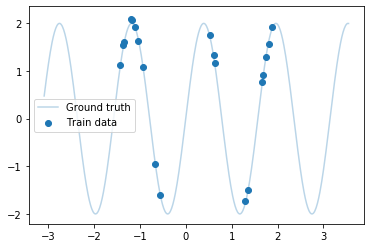

In [4]:
fig, ax = plt.subplots()
ax.plot(_x_test, y_test, label="Ground truth", alpha=0.3)
ax.scatter(_x_train, y_train, label="Train data")
ax.set_xlabel("");
ax.set_ylabel("");
ax.legend();

In [17]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
              initial_learning_rate, decay_steps=20, decay_rate=0.9, staircase=True)

In [18]:
ensemble = MapEnsemble(n_networks=n_networks,
                       input_shape=[1],
                       layer_units=layer_units,
                       layer_activations=layer_activations,
                       learning_rate=lr_schedule)

In [19]:
ensemble.train(x_train=x_train, y_train=y_train, batch_size=batchsize_train)

Train on 20 samples
Epoch 1/120
20/20 [==============================] - 0s 15ms/sample - loss: 2.3661
Epoch 2/120
20/20 [==============================] - 0s 207us/sample - loss: 14.9173
Epoch 3/120
20/20 [==============================] - 0s 292us/sample - loss: 2.1900
Epoch 4/120
20/20 [==============================] - 0s 250us/sample - loss: 2.3089
Epoch 5/120
20/20 [==============================] - 0s 220us/sample - loss: 2.1383
Epoch 6/120
20/20 [==============================] - 0s 273us/sample - loss: 1.8179
Epoch 7/120
20/20 [==============================] - 0s 311us/sample - loss: 1.5418
Epoch 8/120
20/20 [==============================] - 0s 303us/sample - loss: 1.3094
Epoch 9/120
20/20 [==============================] - 0s 275us/sample - loss: 1.3834
Epoch 10/120
20/20 [==============================] - 0s 204us/sample - loss: 1.2657
Epoch 11/120
20/20 [==============================] - 0s 237us/sample - loss: 1.3093
Epoch 12/120
20/20 [==============================] - 

Epoch 98/120
20/20 [==============================] - 0s 195us/sample - loss: 0.0033
Epoch 99/120
20/20 [==============================] - 0s 265us/sample - loss: 0.0025
Epoch 100/120
20/20 [==============================] - 0s 232us/sample - loss: 0.0032
Epoch 101/120
20/20 [==============================] - 0s 320us/sample - loss: 0.0023
Epoch 102/120
20/20 [==============================] - 0s 428us/sample - loss: 0.0026
Epoch 103/120
20/20 [==============================] - 0s 466us/sample - loss: 0.0022
Epoch 104/120
20/20 [==============================] - 0s 403us/sample - loss: 0.0025
Epoch 105/120
20/20 [==============================] - 0s 378us/sample - loss: 0.0020
Epoch 106/120
20/20 [==============================] - 0s 452us/sample - loss: 0.0023
Epoch 107/120
20/20 [==============================] - 0s 421us/sample - loss: 0.0019
Epoch 108/120
20/20 [==============================] - 0s 248us/sample - loss: 0.0020
Epoch 109/120
20/20 [==============================] - 0

20/20 [==============================] - 0s 304us/sample - loss: 0.0045
Epoch 75/120
20/20 [==============================] - 0s 336us/sample - loss: 0.0088
Epoch 76/120
20/20 [==============================] - 0s 364us/sample - loss: 0.0031
Epoch 77/120
20/20 [==============================] - 0s 272us/sample - loss: 0.0052
Epoch 78/120
20/20 [==============================] - 0s 365us/sample - loss: 0.0053
Epoch 79/120
20/20 [==============================] - 0s 259us/sample - loss: 0.0030
Epoch 80/120
20/20 [==============================] - 0s 438us/sample - loss: 0.0043
Epoch 81/120
20/20 [==============================] - 0s 230us/sample - loss: 0.0045
Epoch 82/120
20/20 [==============================] - 0s 349us/sample - loss: 0.0028
Epoch 83/120
20/20 [==============================] - 0s 251us/sample - loss: 0.0037
Epoch 84/120
20/20 [==============================] - 0s 293us/sample - loss: 0.0030
Epoch 85/120
20/20 [==============================] - 0s 270us/sample - loss: 

Epoch 50/120
20/20 [==============================] - 0s 232us/sample - loss: 0.0890
Epoch 51/120
20/20 [==============================] - 0s 266us/sample - loss: 0.0241
Epoch 52/120
20/20 [==============================] - 0s 210us/sample - loss: 0.0717
Epoch 53/120
20/20 [==============================] - 0s 240us/sample - loss: 0.0275
Epoch 54/120
20/20 [==============================] - 0s 205us/sample - loss: 0.0501
Epoch 55/120
20/20 [==============================] - 0s 250us/sample - loss: 0.0292
Epoch 56/120
20/20 [==============================] - 0s 213us/sample - loss: 0.0426
Epoch 57/120
20/20 [==============================] - 0s 273us/sample - loss: 0.0214
Epoch 58/120
20/20 [==============================] - 0s 215us/sample - loss: 0.0407
Epoch 59/120
20/20 [==============================] - 0s 270us/sample - loss: 0.0137
Epoch 60/120
20/20 [==============================] - 0s 268us/sample - loss: 0.0306
Epoch 61/120
20/20 [==============================] - 0s 221us/sa

Epoch 26/120
20/20 [==============================] - 0s 242us/sample - loss: 0.7543
Epoch 27/120
20/20 [==============================] - 0s 204us/sample - loss: 0.6839
Epoch 28/120
20/20 [==============================] - 0s 232us/sample - loss: 0.6157
Epoch 29/120
20/20 [==============================] - 0s 222us/sample - loss: 0.5385
Epoch 30/120
20/20 [==============================] - 0s 207us/sample - loss: 0.4673
Epoch 31/120
20/20 [==============================] - 0s 242us/sample - loss: 0.4283
Epoch 32/120
20/20 [==============================] - 0s 213us/sample - loss: 0.4063
Epoch 33/120
20/20 [==============================] - 0s 200us/sample - loss: 0.4009
Epoch 34/120
20/20 [==============================] - 0s 184us/sample - loss: 0.4885
Epoch 35/120
20/20 [==============================] - 0s 264us/sample - loss: 0.4366
Epoch 36/120
20/20 [==============================] - 0s 219us/sample - loss: 0.2416
Epoch 37/120
20/20 [==============================] - 0s 240us/sa

Epoch 2/120
20/20 [==============================] - 0s 179us/sample - loss: 25.5765
Epoch 3/120
20/20 [==============================] - 0s 181us/sample - loss: 2.1062
Epoch 4/120
20/20 [==============================] - 0s 222us/sample - loss: 2.3418
Epoch 5/120
20/20 [==============================] - 0s 192us/sample - loss: 2.2337
Epoch 6/120
20/20 [==============================] - 0s 218us/sample - loss: 1.9911
Epoch 7/120
20/20 [==============================] - 0s 239us/sample - loss: 1.7027
Epoch 8/120
20/20 [==============================] - 0s 242us/sample - loss: 1.5533
Epoch 9/120
20/20 [==============================] - 0s 182us/sample - loss: 1.3524
Epoch 10/120
20/20 [==============================] - 0s 238us/sample - loss: 1.3332
Epoch 11/120
20/20 [==============================] - 0s 210us/sample - loss: 1.2999
Epoch 12/120
20/20 [==============================] - 0s 202us/sample - loss: 1.2835
Epoch 13/120
20/20 [==============================] - 0s 273us/sample - 

Epoch 99/120
20/20 [==============================] - 0s 238us/sample - loss: 0.0023
Epoch 100/120
20/20 [==============================] - 0s 332us/sample - loss: 0.0022
Epoch 101/120
20/20 [==============================] - 0s 276us/sample - loss: 0.0021
Epoch 102/120
20/20 [==============================] - 0s 303us/sample - loss: 0.0021
Epoch 103/120
20/20 [==============================] - 0s 273us/sample - loss: 0.0018
Epoch 104/120
20/20 [==============================] - 0s 258us/sample - loss: 0.0019
Epoch 105/120
20/20 [==============================] - 0s 328us/sample - loss: 0.0019
Epoch 106/120
20/20 [==============================] - 0s 208us/sample - loss: 0.0016
Epoch 107/120
20/20 [==============================] - 0s 356us/sample - loss: 0.0017
Epoch 108/120
20/20 [==============================] - 0s 256us/sample - loss: 0.0017
Epoch 109/120
20/20 [==============================] - 0s 286us/sample - loss: 0.0015
Epoch 110/120
20/20 [==============================] - 

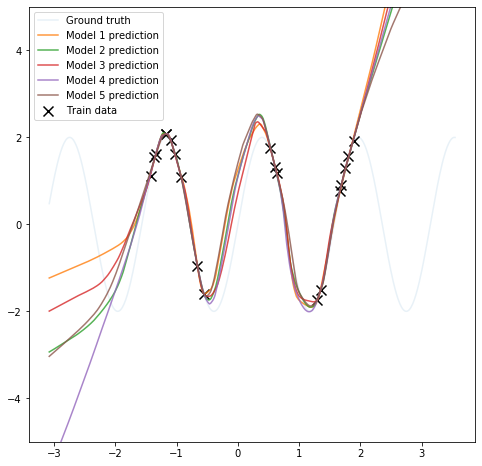

In [22]:
predictions = ensemble.predict(x_test)

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(_x_test, y_test, label="Ground truth", alpha=0.1)
for i, prediction in enumerate(predictions):
    ax.plot(_x_test, prediction, label=f"Model {i+1} prediction", alpha=0.8)
ax.scatter(_x_train, y_train, c='k', marker='x', s=100, label="Train data")
ax.set_xlabel("");
ax.set_ylabel("");
ax.set_ylim([-5, 5])
ax.legend();
#fig.savefig(os.path.join(figure_dir, f"{n_networks}_ml_ensemble.pdf"))